<a href="https://colab.research.google.com/github/Tina-Gh/PyTorch/blob/main/PytorchDocumentation/pytorch_04_Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Autograd:


summary:

1. you set <b>requires_grad=True</b> in the tensor definition.
2. You can check the progression of dependent tensor variables using: <b>.grad_fn</b> and <b>.grad_functions</b>
3. To calculate the derivatives of teh leaf node, call <b>.backward()</b> on the output variable. The partial derivative on the leaf node is <b>.grad()</b> on the leaf variable.

In [ ]:
 # for calculating gradients, in ML
 # where Autograd comes in: it tracks the history of every computation.

In [ ]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
a = torch.linspace(0, 2*math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


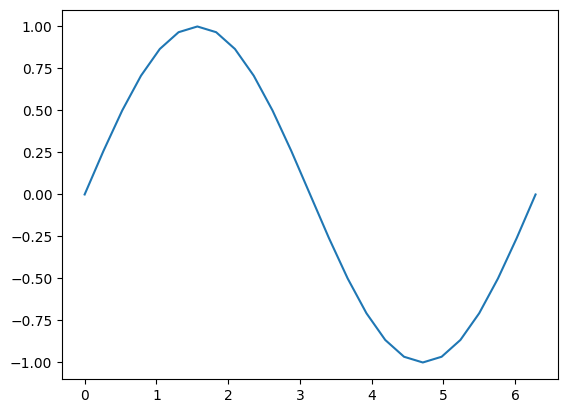

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach()) #we should use .detach() because torch doesn't accept gradients

In [ ]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [ ]:
c = 2*b
print(c)

d = c+1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [ ]:
# finally, let's create a single-element output:

# a -> b -> c -> d -> out
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [ ]:
# walk the computations all the way back to its inputs using: grad_fn and next_functions

print('d:')
print(d.grad_fn) #d
print(d.grad_fn.next_functions) #c
print(d.grad_fn.next_functions[0][0].next_functions) #b
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions) #a
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions) #NOL

print('\nc:')
print(c.grad_fn)

print('\nb:')
print(b.grad_fn)

print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7d6e4c5ee920>, 0), (None, 0))
((<SinBackward0 object at 0x7d6e4c5ed180>, 0), (None, 0))
((<AccumulateGrad object at 0x7d6d8531bbb0>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


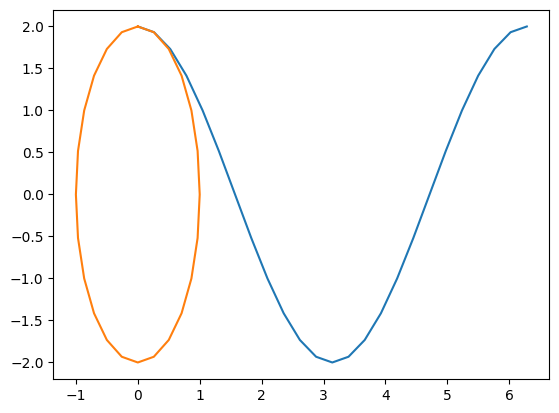

In [ ]:
out.backward()

print(a.grad) #calculates the derivative; #∂(out)/∂(a) = ∂(2*sin(a) + 1)/∂(a) = 2*cos(a)
plt.plot(a.detach(), a.grad.detach())
plt.plot(b.detach(), a.grad.detach())

In [ ]:
print(b)

print(b.grad) #∂(out)/∂(b) = ∂(2*b + 1)/∂(b) = 2

# Be aware that only leaf nodes of the computation have their gradients computed. If you tried, for example, print(c.grad) you’d get back None.
# In this simple example, only the input is a leaf node, so only it has gradients computed.

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)
None


<ipython-input-11-08c7e9529ff2>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad) #∂(out)/∂(b) = ∂(2*b + 1)/∂(b) = 2


# 2. Autograd in Training:

We’ve had a brief look at how autograd works, but how does it look when it’s used for its intended purpose? Let’s define a small model and examine how it changes after a single training batch. First, define a few constants, our model, and some stand-ins for inputs and outputs:

In [ ]:
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10
BATCH_SIZE = 16


class TinyModel(nn.Module):
  def __init__(self):
    super(TinyModel, self).__init__()

    self.layer1 = nn.Linear(DIM_IN, HIDDEN_SIZE)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(HIDDEN_SIZE, DIM_OUT)

  def forward(self, x):
      x = self.layer1(x)
      x = self.relu(x)
      x = self.layer2(x)
      return x

some_input = torch.rand(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.rand(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [ ]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.shape)
# print(model.layer2.weight.grad[0][0:10]) #because no gradients have been computed yet.

tensor([ 0.0338,  0.0380, -0.0880,  0.0258, -0.0884, -0.0960,  0.0737, -0.0011,
         0.0440,  0.0249], grad_fn=<SliceBackward0>)
torch.Size([10, 100])


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
predictions = model(some_input)
loss = (ideal_output - predictions).pow(2).sum()
print(loss)

tensor(66.5679, grad_fn=<SumBackward0>)


In [ ]:
loss.backward()

print(model.layer2.weight[0][0:10])
print(model.layer2.weight.shape)
print(model.layer2.weight.grad[0][0:10])

# We can see that the gradients have been computed for each learning weight, but the weights remain unchanged, because we haven’t run the optimizer yet.
# The optimizer is responsible for updating model weights based on the computed gradients.

tensor([ 0.0338,  0.0380, -0.0880,  0.0258, -0.0884, -0.0960,  0.0737, -0.0011,
         0.0440,  0.0249], grad_fn=<SliceBackward0>)
torch.Size([10, 100])
tensor([-2.0770, -4.3460, -0.2600,  0.0000, -2.9335, -0.7889, -0.4474, -0.4449,
         0.0000, -2.7950])


In [ ]:
optimizer.step()

print(model.layer2.weight[0][0:10])
print(model.layer2.weight.shape)
print(model.layer2.weight.grad[0][0:10])

# One important thing about the process: After calling optimizer.step(), you need to call optimizer.zero_grad(),
# or else every time you run loss.backward(), the gradients on the learning weights will accumulate:

tensor([ 0.0359,  0.0423, -0.0877,  0.0258, -0.0855, -0.0952,  0.0741, -0.0006,
         0.0440,  0.0277], grad_fn=<SliceBackward0>)
torch.Size([10, 100])
tensor([-2.0770, -4.3460, -0.2600,  0.0000, -2.9335, -0.7889, -0.4474, -0.4449,
         0.0000, -2.7950])


In [ ]:
for i in range(0, 20):
  predictions = model(some_input)
  loss = (ideal_output - predictions).pow(2).sum()
  loss.backward()

print(model.layer2.weight.grad[0][0:10])

tensor([-66.7429,  -4.3460,  -0.2600,   0.0000, -34.6724,  -0.7828,  -7.1061,
         -3.2067,   0.0000, -30.6770])


In [ ]:
optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

# After running the cell above, you should see that after running loss.backward() multiple times, the magnitudes of most of the gradients will be much larger.
# Failing to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


# 3. Turning Autograd on and off:

In [ ]:
# method 1: The simplest is to change the requires_grad flag on a tensor directly.

a = torch.ones(2, 3, requires_grad=True)
print('a: \n', a)

b = a*2
print('b: \n', b)

a.requires_grad = False
b = a*2
print('b: \n', b)

a: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
b: 
 tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
b: 
 tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
# method 2: If you only need autograd turned off temporarily, a better way is to use the torch.no_grad()

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a+b
print(c1)

with torch.no_grad():
  c2 = a+b
print(c2)

c3 = c1+c2
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[10., 10., 10.],
        [10., 10., 10.]], grad_fn=<AddBackward0>)


In [ ]:
# torch.no_grad() can also be used as a funcion or method decorator.
# The opposite function torch.enable_grad() can also be used as a funcion or method decorator too.
def add_tensors(a, b):
  return a+b

@torch.no_grad()
def add_tensors_2(a, b):
  return a+b

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors(a, b)
print(c1)

c2 = add_tensors_2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
#method 3: using detach(): it creates a copy of the tensor that is detached from the computation history

x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

# We used .detach() we wanted to graph some of our tensors. This is because matplotlib expects a NumPy array as input, and the implicit conversion from a
# PyTorch tensor to a NumPy array is not enabled for tensors with requires_grad=True. Making a detached copy lets us move forward.

tensor([0.2795, 0.8255, 0.7172, 0.1798, 0.6626], requires_grad=True)
tensor([0.2795, 0.8255, 0.7172, 0.1798, 0.6626])


# 4. Autograd Profiler:

In [ ]:
# Autograd tracks every step of your computation in detail. Such a computation history, combined with timing information,
# would make a handy profiler - and autograd has that feature baked in. Here’s a quick example usage:

device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
  device = torch.device('cuda')
  run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.randn(2, 3, requires_grad=True)
z = torch.randn(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
  for _ in range(1000):
    z = (z/x)*y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

# The profiler can also label individual sub-blocks of code, break out the data by input tensor shape, and export data as a Chrome tracing tools file.

<ipython-input-27-3dbdf259df72>:14: FutureWarning: The attribute `use_cuda` will be deprecated soon, please use ``use_device = 'cuda'`` instead.
  with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:


------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                     cudaEventRecord        39.45%      11.193ms        39.45%      11.193ms       2.798us       0.000us         0.00%       0.000us       0.000us          4000  
                           aten::mul        32.27%       9.155ms        32.27%       9.155ms       9.155us      14.842ms        50.50%      14.842ms      14.842us          1000  
                           aten::div        27.18%       7.712ms        27.18%       7.712ms       7.712

# 5. The high-level API:


In [ ]:
# There is an API on autograd that gives you direct access to important differential matrix and vector operations. In particular,
# it allows you to calculate the Jacobian and the Hessian matrices of a particular function for particular inputs. (The Hessian is like the Jacobian,
# but expresses all partial second derivatives.) It also provides methods for taking vector products with these matrices.

# Let’s take the Jacobian of a simple function, evaluated for a 2 single-element inputs:

def exp_adder(x, y):
  return 2*x.exp() + 3*y # = 2e^x + 3y

inputs = (torch.rand(1), torch.rand(1))
print('inputs:\n', inputs)

print('\njacoubian:')
torch.autograd.functional.jacobian(exp_adder, inputs) # = d(2e^x, 3y) = (2e^x, 3)

inputs:
 (tensor([0.5805]), tensor([0.9700]))

jacoubian:


(tensor([[3.5739]]), tensor([[3.]]))

In [ ]:
# we can, of course, do this with higher-order tensors: -> we should use hesian since it's for second derivatives. jacoubian is for first derivatives.

#.hesian()
# .jvp() or .vjp()